In [1]:
from __future__ import print_function
import numpy as np
from numpy import newaxis as na
import keras

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM
from keras.datasets import imdb
from keras.models import Model
from keras import backend as K

import matplotlib.pyplot as plt
from IPython.display import display, HTML

Using TensorFlow backend.
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [3]:
import os
import sys
import numpy as np
import keras
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Activation, Conv2D, Input, Embedding, Reshape, MaxPool2D, Concatenate, Flatten, Dropout, Dense, Conv1D
from keras.layers import MaxPool1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

from keras.layers import Embedding
# preparing input to our model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# keras layers
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, GRU, Dense
# preparing input to our model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import pandas as pd

# keras layers
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

In [4]:
# Let's import and prep the datasets

train=pd.read_csv('../../DeepHateLingo/input/train.csv', sep=',', encoding='utf-8')
test=pd.read_csv('../../DeepHateLingo/input/test.csv', sep=',', encoding='utf-8')

train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5887 entries, 0 to 5886
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5887 non-null   object
 1   label   5887 non-null   object
 2   target  5887 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 138.1+ KB


,text,label,target
0,৭৫ হামলার আসামী কে এই গডফাদার কালা মন্দির?,Personal,0
1,রাজাকারদের মন্ত্রী বানানোর দায়ে তার আরও কঠিন ব...,Political,1
2,বৃটিশ নাগরিকদের বাংলাদেশ ভ্রমনে সতর্কতা জারী ২...,Geopolitical,3
3,বলদ নয়াদিগন্ত কালকে রিপোর্ট করলো হিলারী শপথ ন...,Political,1
4,অসভ্য বর্বর বেহায়া ভোট ডাকাত সকল প্রকার খারাপ ...,Geopolitical,3


In [5]:
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1200 non-null   object
 1   label   1200 non-null   object
 2   target  1200 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 28.2+ KB


,text,label,target
0,মুশরিকদের হত্যা কর যেখানেই তাদের পাও এবং তাদের...,Religious,2
1,কোথায় মহারানী আর কোথায় চুতমারানী?,Personal,0
2,হিন্দু বা কাফের দের সাতে হাত মিলিয়ে সারা দুনিয়...,Religious,2
3,নিজের তো সব গেছেই এখন মেয়েটার জীবন শেষ করতে আক...,Personal,0
4,"এই ছবি পুরো জাতীকে লজ্জা দেয়, আজ ঢাকায় ট্রাক থ...",Political,1


In [6]:
import csv 

stop_words='../../DeepHateLingo/input/stopwords-bn.txt'
text_data=[]

with open(stop_words,'r',encoding='utf-8') as temp_output_file:
    reader=csv.reader(temp_output_file, delimiter='\n')
    for row in reader:
        text_data.append(row)
stop_word_list=[x[0] for x in text_data]

In [7]:
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  
from nltk.tokenize.treebank import TreebankWordDetokenizer
  
stop_words = set(stop_word_list)  

def textCleaner(example_sent): 
    word_tokens = word_tokenize(example_sent)  
    #filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_train = TreebankWordDetokenizer().detokenize(word_tokens)

    return filtered_train        

In [8]:
filtered_test = test['text'].apply(textCleaner)

In [9]:
filtered_train = train['text'].apply(textCleaner)

In [10]:
filtered_test

0       মুশরিকদের হত্যা কর যেখানেই তাদের পাও এবং তাদের...
1                       কোথায় মহারানী আর কোথায় চুতমারানী?
2       হিন্দু বা কাফের দের সাতে হাত মিলিয়ে সারা দুনিয়...
3       নিজের তো সব গেছেই এখন মেয়েটার জীবন শেষ করতে আক...
4       এই ছবি পুরো জাতীকে লজ্জা দেয়, আজ ঢাকায় ট্রাক থ...
                              ...                        
1195    কুদ্দুস বলতো গরু আমাদের কি দেয়? স্যার, গরু আমা...
1196    ওরা দুজন আগের জন্মে মুসলমান ছিল এই জন্মে হিন্দ...
1197    মুহম্মদ দুনিয়াতেই মাগিবাজি লম্পটগিরি করল তার উ...
1198           কেনেন, লাগান, ভুলে যান। আরাম করে চুদে দেন।
1199    এক পক্ষ হয়রানির শিকার সময়ের সাহসী শিক্ষক হালিম...
Name: text, Length: 1200, dtype: object

In [11]:
train['label'].value_counts()

Personal        2561
Geopolitical    1691
Religious        908
Political        727
Name: label, dtype: int64

In [12]:
train['target'].value_counts()

0    2561
3    1691
2     908
1     727
Name: target, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(filtered_train, train['target'].values, test_size=0.2, random_state=42)

In [14]:
x_test, y_test = filtered_test, test['target'].values

In [15]:
max_features = 10000

maxlen = 20
batch_size = 32

In [16]:
tokenizer  = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(x_train)

train_seq =  tokenizer.texts_to_sequences(x_train)
val_seq =  tokenizer.texts_to_sequences(x_val)
test_seq = tokenizer.texts_to_sequences(x_test)

word_index = tokenizer.word_index
print("Unique words : {}".format(len(word_index)))

x_train = pad_sequences(train_seq, maxlen=maxlen, dtype='int32', padding='post') #maxlen = maxlen, padding='post')
x_val = pad_sequences(val_seq, maxlen=maxlen, dtype='int32', padding='post') #maxlen = maxlen, padding='post')
x_test = pad_sequences(test_seq, maxlen=maxlen, dtype='int32', padding='post') #maxlen = maxlen, padding='post')

y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

#y_train = to_categorical(np.asarray(y_train), num_classes=5)
#y_val = to_categorical(np.asarray(y_val), num_classes=5)
#y_test = to_categorical(np.asarray(y_test), num_classes=5)

print('Shape of training data tensor:', x_train.shape)
print('Shape of training label tensor:', y_val.shape)

print('Shape of val data tensor:', x_val.shape)
print('Shape of val label tensor:', y_val.shape)

print('Shape of test data tensor:', x_test.shape)
print('Shape of test label tensor:', y_test.shape)

Unique words : 15677
Shape of training data tensor: (4709, 20)
Shape of training label tensor: (1178,)
Shape of val data tensor: (1178, 20)
Shape of val label tensor: (1178,)
Shape of test data tensor: (1200, 20)
Shape of test label tensor: (1200,)


In [17]:
import pandas as pd
import numpy as np
from itertools import permutations
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from nltk.stem import PorterStemmer

In [18]:
from gensim.models.keyedvectors import KeyedVectors
from gensim.models import Word2Vec

word_vectors = Word2Vec.load('../../DeepHateLingo/models/Bengali_FastText_DIM20.model')
#word_vectors = Word2Vec.load('./models/posts.bin')

In [19]:
NUM_WORDS=20000
EMBEDDING_DIM=20

vocabulary_size=len(tokenizer.word_index)+1
word_index=tokenizer.word_index
embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))

for word, i in word_index.items():
    if i>=NUM_WORDS:
        continue
    try:
        embedding_vector=word_vectors[word]
        embedding_matrix[i]=embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)

del(word_vectors)

In [20]:
embedding_layer=Embedding(vocabulary_size, EMBEDDING_DIM, weights=[embedding_matrix],trainable=False)

In [21]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.layers import Embedding
from keras.initializers import Constant
from keras.layers import *

In [22]:
def BiLSTM_Model():
    model = Sequential()
    model.add(embedding_layer)
    model.add(SpatialDropout1D(0.5))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dropout(0.2))
    model.add(Bidirectional(LSTM(32)))
    #model.add(Dropout(0.2))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(units=4, activation='softmax'))
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
    
    print(model.summary())
    
    return model     

In [23]:
model = BiLSTM_Model()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 20)          313560    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, None, 20)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         43520     
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
______________________

In [24]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=50, verbose=1, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 4709 samples, validate on 1178 samples
Epoch 1/50
4709/4709 [==============================] - 5s 1ms/step - loss: 1.1624 - acc: 0.5271 - val_loss: 1.0279 - val_acc: 0.5857
Epoch 2/50
4709/4709 [==============================] - 3s 659us/step - loss: 1.0607 - acc: 0.5776 - val_loss: 0.9618 - val_acc: 0.6171
Epoch 3/50
4709/4709 [==============================] - 3s 662us/step - loss: 1.0454 - acc: 0.5772 - val_loss: 0.9382 - val_acc: 0.6375
Epoch 4/50
4709/4709 [==============================] - 3s 662us/step - loss: 1.0250 - acc: 0.5861 - val_loss: 0.9104 - val_acc: 0.6452
Epoch 5/50
4709/4709 [==============================] - 3s 662us/step - loss: 1.0002 - acc: 0.6099 - val_loss: 0.8723 - val_acc: 0.6545
Epoch 6/50
4709/4709 [==============================] - 3s 661us/step - loss: 0.9952 - acc: 0.6031 - val_loss: 0.8474 - val_acc: 0.6749
Epoch 7/50
4709/4709 [======================

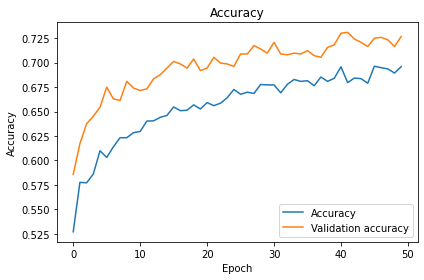

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label="Accuracy")
plt.plot(history.history['val_acc'], label="Validation accuracy")
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

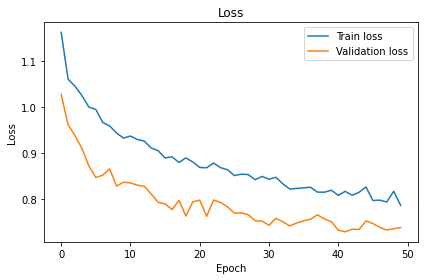

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label="Train loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

In [28]:
y_pred

array([2, 0, 2, ..., 0, 0, 0])

In [29]:
categories = ['Personal', 'Geopolitical','Religious','Political']
print(classification_report(y_test, y_pred, target_names=categories))

              precision    recall  f1-score   support

    Personal       0.77      0.89      0.82       524
Geopolitical       0.57      0.57      0.57       157
   Religious       0.57      0.42      0.48       159
   Political       0.77      0.69      0.73       360

    accuracy                           0.73      1200
   macro avg       0.67      0.64      0.65      1200
weighted avg       0.72      0.72      0.72      1200



In [30]:
test['target'].value_counts()

0    524
3    360
2    159
1    157
Name: target, dtype: int64

In [31]:
def get_layer_output(layer_name, data):
    # https://keras.io/getting-started/faq/#how-can-i-obtain-the-output-of-an-intermediate-layer
    intermediate_layer_model = keras.Model(inputs=model.input,
                                     outputs=model.get_layer(layer_name).output)
    return intermediate_layer_model.predict(data)  

In [32]:
names = [weight.name for layer in model.layers for weight in layer.weights]
weights = model.get_weights()

for name, weight in zip(names, weights):
    print(name)
    #print(weight)

embedding_1/embeddings:0
bidirectional_1/forward_lstm_1/kernel:0
bidirectional_1/forward_lstm_1/recurrent_kernel:0
bidirectional_1/forward_lstm_1/bias:0
bidirectional_1/backward_lstm_1/kernel:0
bidirectional_1/backward_lstm_1/recurrent_kernel:0
bidirectional_1/backward_lstm_1/bias:0
bidirectional_2/forward_lstm_2/kernel:0
bidirectional_2/forward_lstm_2/recurrent_kernel:0
bidirectional_2/forward_lstm_2/bias:0
bidirectional_2/backward_lstm_2/kernel:0
bidirectional_2/backward_lstm_2/recurrent_kernel:0
bidirectional_2/backward_lstm_2/bias:0
dense_1/kernel:0
dense_1/bias:0
dense_2/kernel:0
dense_2/bias:0


In [33]:
# suppress scientific notation
np.set_printoptions(suppress=True)
for name, weight in zip(names, weights):
    if name == 'bidirectional_1/backward_lstm_1/kernel:0':
        kernel_0 = weight
    if name == 'bidirectional_1/backward_lstm_1/recurrent_kernel:0':
        recurrent_kernel_0 = weight
    if name == 'bidirectional_1/backward_lstm_1/bias:0':
        bias_0 = weight
    elif name == 'dense_1/kernel:0':
        output = weight

In [34]:
print("kernel_0", kernel_0.shape)
print("recurrent_kernel_0", recurrent_kernel_0.shape)
print("bias_0", bias_0.shape)
print("output", output.shape)

# self.Wxh_Left (240, 60)
# self.Whh_Left (240, 60)
# self.bxh_Left (240,)
# self.Why_Left (5, 60)

kernel_0 (20, 256)
recurrent_kernel_0 (64, 256)
bias_0 (256,)
output (64, 128)


In [35]:
Wxh = kernel_0.T  # shape 4d*e
Whh = recurrent_kernel_0.T  # shape 4d
bxh = bias_0.T  # shape 4d 
Why = output.T

print("Wxh", Wxh.shape)
print("Whh", Whh.shape)
print("bxh", bxh.shape)
print("Why", Why.shape)

Wxh (256, 20)
Whh (256, 64)
bxh (256,)
Why (128, 64)


In [36]:
def html_heatmap (words, scores, cmap_name="bwr"):
    """
    Return word-level heatmap in HTML format,
    with words being the list of words (as string),
    scores the corresponding list of word-level relevance values,
    and cmap_name the name of the matplotlib diverging colormap.
    """
    
    colormap  = plt.get_cmap(cmap_name)
     
    #assert len(words)==len(scores)
    max_s     = max(scores)
    min_s     = min(scores)
    
    output_text = ""
    
    for idx, w in enumerate(words):
        score       = rescale_score_by_abs(scores[idx], max_s, min_s)
        output_text = output_text + span_word(w, score, colormap) + " "
    
    return output_text + "\n"

def rescale_score_by_abs (score, max_score, min_score):
    """
    Normalize the relevance value (=score), accordingly to the extremal relevance values (max_score and min_score), 
    for visualization with a diverging colormap.
    i.e. rescale positive relevance to the range [0.5, 1.0], and negative relevance to the range [0.0, 0.5],
    using the highest absolute relevance for linear interpolation.
    """
    
    # CASE 1: positive AND negative scores occur --------------------
    if max_score>0 and min_score<0:
    
        if max_score >= abs(min_score):   # deepest color is positive
            if score>=0:
                return 0.5 + 0.5*(score/max_score)
            else:
                return 0.5 - 0.5*(abs(score)/max_score)

        else:                             # deepest color is negative
            if score>=0:
                return 0.5 + 0.5*(score/abs(min_score))
            else:
                return 0.5 - 0.5*(score/min_score)   
    
    # CASE 2: ONLY positive scores occur -----------------------------       
    elif max_score>0 and min_score>=0: 
        if max_score == min_score:
            return 1.0
        else:
            return 0.5 + 0.5*(score/max_score)
    
    # CASE 3: ONLY negative scores occur -----------------------------
    elif max_score<=0 and min_score<0: 
        if max_score == min_score:
            return 0.0
        else:
            return 0.5 - 0.5*(score/min_score)
          

def getRGB (c_tuple):
    return "#%02x%02x%02x"%(int(c_tuple[0]*255), int(c_tuple[1]*255), int(c_tuple[2]*255))

     
def span_word (word, score, colormap):
    return "<span style=\"background-color:"+getRGB(colormap(score))+"\">"+word+"</span>"

In [37]:
def lrp_linear(hin, w, b, hout, Rout, bias_nb_units, eps, bias_factor=0.0, debug=False):
    """
    LRP for a linear layer with input dim D and output dim M.
    Args:
    - hin:            forward pass input, of shape (D,)
    - w:              connection weights, of shape (D, M)
    - b:              biases, of shape (M,)
    - hout:           forward pass output, of shape (M,) (unequal to np.dot(w.T,hin)+b if more than one incoming layer!)
    - Rout:           relevance at layer output, of shape (M,)
    - bias_nb_units:  total number of connected lower-layer units (onto which the bias/stabilizer contribution is redistributed for sanity check)
    - eps:            stabilizer (small positive number)
    - bias_factor:    set to 1.0 to check global relevance conservation, otherwise use 0.0 to ignore bias/stabilizer redistribution (recommended)
    Returns:
    - Rin:            relevance at layer input, of shape (D,)
    """
    sign_out = np.where(hout[na,:]>=0, 1., -1.) # shape (1, M)
    
    numer    = (w * hin[:,na]) + ( bias_factor * (b[na,:]*1. + eps*sign_out*1.) / bias_nb_units ) # shape (D, M)
    # Note: here we multiply the bias_factor with both the bias b and the stabilizer eps since in fact
    # using the term (b[na,:]*1. + eps*sign_out*1.) / bias_nb_units in the numerator is only useful for sanity check
    # (in the initial paper version we were using (bias_factor*b[na,:]*1. + eps*sign_out*1.) / bias_nb_units instead)
    
    denom    = hout[na,:] + (eps*sign_out*1.)   # shape (1, M)
    
    message  = (numer/denom) * Rout[na,:]       # shape (D, M)
    
    Rin      = message.sum(axis=1)              # shape (D,)
    
    if debug:
        print("local diff: ", Rout.sum() - Rin.sum())
    # Note: 
    # - local  layer   relevance conservation if bias_factor==1.0 and bias_nb_units==D (i.e. when only one incoming layer)
    # - global network relevance conservation if bias_factor==1.0 and bias_nb_units set accordingly to the total number of lower-layer connections 
    # -> can be used for sanity check
    
    return Rin

In [38]:
def LRP(target_data, target_class) :
    
    #원본 소스에서 E embedding은 전체에 대한 단어 사전이고, x는 embedding된 인풋이다.  
    # w_indices [109, 11995, 25, 18263, 25, 973, 3138, 6389, 372]

    x = get_layer_output('embedding_1', target_data).squeeze(axis=1)
    e = x.shape[1]

   ################# forword
    T = target_data.shape[0]
    d = int(256/4)  # hidden units
    C = Why.shape[0] # number of classes
    
    idx    = np.hstack((np.arange(0,d), np.arange(2*d,4*d))).astype(int) # indices of gates i,f,o together
    idx_i, idx_g, idx_f, idx_o = np.arange(0,d), np.arange(d,2*d), np.arange(2*d,3*d), np.arange(3*d,4*d) # indices of gates i,g,f,o separately

    h  = np.zeros((T,d))
    c  = np.zeros((T,d))

    gates_xh  = np.zeros((T, 4*d))  
    gates_hh  = np.zeros((T, 4*d)) 
    gates_pre = np.zeros((T, 4*d))  
    gates     = np.zeros((T, 4*d))  

    for t in range(T):
        gates_xh[t]     = np.dot(Wxh, x[t])
        gates_hh[t]     = np.dot(Whh, h[t-1])
        gates_pre[t]    = gates_xh[t] + gates_hh[t] + bxh
        gates[t, idx]    = 1.0/(1.0 + np.exp(- gates_pre[t,idx]))
        gates[t,idx_g]  = np.tanh(gates_pre[t,idx_g]) 
        c[t]            = gates[t,idx_f]*c[t-1] + gates[t,idx_i]*gates[t,idx_g]
        h[t]            = gates[t,idx_o]*np.tanh(c[t])

    s = np.dot(Why, h[t])    

    ################# backwork
    dx     = np.zeros(x.shape)

    dh          = np.zeros((T, d))
    dc          = np.zeros((T, d))
    dgates_pre  = np.zeros((T, 4*d))  # gates pre-activation
    dgates      = np.zeros((T, 4*d))  # gates activation

    ds               = np.zeros((C))
    ds[target_class] = 1.0
    dy               = ds.copy()

    #맨처음을 0으로 시작하지 않게 위한조치
    dh[T-1]     = np.dot(Why.T, dy)

    for t in reversed(range(T)): 
        dgates[t,idx_o]    = dh[t] * np.tanh(c[t])  # do[t]
        dc[t]             += dh[t] * gates[t,idx_o] * (1.-(np.tanh(c[t]))**2) # dc[t]
        dgates[t,idx_f]    = dc[t] * c[t-1]         # df[t]
        dc[t-1]            = dc[t] * gates[t,idx_f] # dc[t-1]
        dgates[t,idx_i]    = dc[t] * gates[t,idx_g] # di[t]
        dgates[t,idx_g]    = dc[t] * gates[t,idx_i] # dg[t]
        dgates_pre[t,idx]  = dgates[t,idx] * gates[t,idx] * (1.0 - gates[t,idx]) # d ifo pre[t]
        dgates_pre[t,idx_g]= dgates[t,idx_g] *  (1.-(gates[t,idx_g])**2) # d g pre[t]
        dh[t-1]            = np.dot(Whh.T, dgates_pre[t])
        dx[t]              = np.dot(Wxh.T, dgates_pre[t])

    ################# LRP
    eps=0.001 
    bias_factor=0.0
    Rx  = np.zeros(x.shape)
    Rh  = np.zeros((T+1, d))
    Rc  = np.zeros((T+1, d))
    Rg  = np.zeros((T,   d)) # gate g only

    Rout_mask            = np.zeros((C))
    Rout_mask[target_class] = 1.0  

    # format reminder: lrp_linear(hin, w, b, hout, Rout, bias_nb_units, eps, bias_factor)
    Rh[T-1]  = lrp_linear(h[T-1], Why.T, np.zeros((C)), s, s*Rout_mask, 2*d, eps, bias_factor, debug=False)  

    for t in reversed(range(T)):
        Rc[t]   += Rh[t]
        Rc[t-1]  = lrp_linear(gates[t,idx_f]*c[t-1], np.identity(d), np.zeros((d)), c[t], Rc[t], 2*d, eps, bias_factor, debug=False)
        Rg[t]    = lrp_linear(gates[t,idx_i]*gates[t,idx_g], np.identity(d), np.zeros((d)), c[t], Rc[t], 2*d, eps, bias_factor, debug=False)
        Rx[t]    = lrp_linear(x[t], Wxh[idx_g].T, bxh[idx_g], gates_pre[t,idx_g], Rg[t], d+e, eps, bias_factor, debug=False)
        Rh[t-1]  = lrp_linear(h[t-1], Whh[idx_g].T, bxh[idx_g], gates_pre[t,idx_g], Rg[t], d+e, eps, bias_factor, debug=False)    

    return s, dx, Rx, Rh[-1].sum()

In [39]:
#word_index = imdb.get_word_index()
index_word = {v:k for k,v in word_index.items()}

#values = ','.join(str(v) for v in value_list)

def index_to_word(word):
    full_sentence = ' '.join(index_word.get(w) for w in word)
    return full_sentence.split()

In [40]:
def int_to_str(target_class):
    if target_class == 0:
        return "Personal"
    elif target_class == 1:
        return "Political"
    elif target_class == 2:
        return "Religious"
    elif target_class == 3:
        return "Geopolitical"
    else:
        return "Fake"

In [41]:
predictions = model.predict(x_test)

In [42]:
per_list = []
geo_list = []
reli_list = []
poli_list = []

categories = ['Personal', 'Geopolitical','Religious','Political']

for i in range(len(y_test)):
    if np.argmax(predictions[i]) == 0:
        per_list.append(i)
    elif np.argmax(predictions[i]) == 1:
        geo_list.append(i)
    elif np.argmax(predictions[i]) == 2:
        reli_list.append(i)
    else:
        poli_list.append(i)

In [43]:
index_word = {v: k for k, v in word_index.items()} # map back
seqs = x_test
words = []

def seqToWords():
    for seq in seqs:
        if len(seq):
            words.append(index_word.get(seq[0]))
        else:
            words.append(' ')    
            
    return words

In [44]:
words = seqToWords()

In [45]:
# Creating a reverse dictionary
reverse_word_map = dict(map(reversed, word_index.items()))

# Function takes a tokenized sentence and returns the words
def sequence_to_text(list_of_indices):
    # Looking up words in dictionary
    words = [reverse_word_map.get(letter) for letter in list_of_indices]
    
    return words

In [46]:
def explainer(class_list):   
    for index, i in enumerate(class_list):
    
        target_data = x_test[i]
        print(target_data)
        print(target_data.shape)
        target_class = np.argmax(y_test[i])

        scores, Gx, Rx, R_rest = LRP(target_data, target_class)
    
        R_words          = np.sum(Rx, axis=1)                       # compute word-level LRP relevances
        R_words_SA       = (np.linalg.norm(Gx,ord=2, axis=0))**2   # compute word-level Sensitivity Analysis relevances
        R_words_GI       = np.dot(target_data, Gx) 
    
        try:
            words = index_to_word(target_data)
            #continue
        #words = seqToWords()
        except:
            continue

        if len(words) > 0 :
            print("Predicted label:", int_to_str(np.argmax(predictions[i])), "Actual label:", int_to_str(target_class))

            print("LRP heatmap:")
            display(HTML(html_heatmap(words, R_words)))

            print("SA heatmap:")
            display(HTML(html_heatmap(words, R_words_SA)))

            print("GI heatmap:")
            display(HTML(html_heatmap(words, R_words_GI)))

            print("-----------------------------------------------------------")

        if index == 50: 
            break

In [47]:
print("The degree to which each word affects the prediction of being religious hates...")
explainer(reli_list)

The degree to which each word affects the prediction of being religious hates...
[  94  254   38 2537   88   38 3773 2486  433   88   38 1314   38 1494
   15   29    0    0    0    0]
(20,)
[  51  206  959  124 1729  270  375 3767 1586  139   29 9610    0    0
    0    0    0    0    0    0]
(20,)
[3316 1557  153  321  655   43 1958 1054  129   78    1    0    0    0
    0    0    0    0    0    0]
(20,)
[101  70 311 923   2  50   1   0   0   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[ 210 8224  491  372  526 6608  456    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 210 8224  491  372  526 6608    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[1591 3295 2513   28  210    3 3687 6020 1557 6020 1489 3295 2513    0
    0    0    0    0    0    0]
(20,)
[919 201 163   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[7356 1794  371   16    3  715 7357   26  145    0    0    0    0    0
    0    0    0 

SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  95  584 4624 1529   66   15   66   39  254  907 3484 1610 2545  718
 1286 1087 2173    0    0    0]
(20,)
[  78    3  709  104 6171  168   78   93  398  461    2   37   82  295
 1173   33   19   33   37  563]
(20,)
Predicted label: Religious Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  49 8588    3   51 2698   16    1 6348    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 101  313   45   24   49  124 4789   23  404  149  634  634  879    2
   27   14   49  124  990 9033]
(20,)
Predicted label: Religious Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  82  182  268   25   27    3 1466  268    2    5   82    6 1732 1155
    0    0    0    0    0    0]
(20,)
[5673   90  678 5674   86    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 241  374 1791 1542   26 2740  679  110  145    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  91  530  502  110   25   14 1231   77 1231  156 1536 4934 1649    0
    0    0    0    0    0    0]
(20,)
[ 146  344 3076  159 2631   67 1512  104  200   29  131   93   90   67
 1813 5259 3453    0    0    0]
(20,)
[   3   39  175  141  175  124  144    1   50  635  820  384    4  368
  583   38 1118 1260   44  213]
(20,)
Predicted label: Religious Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[1032 1255    5 1005  301    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[   5   64  832   14  161  268  511    2  451 1418 6921 3475    0    0
    0    0    0    0    0    0]
(20,)
[  72   51 2930  639   49 1448    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 101 1824 1082 1302   38  757  194  194  766    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  55   47 6482    1   74  295   54   49  464  730   29 5236 6085 4742
    0    0    0    0    0    0]
(20,)
[2484  339  566  843 2501    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  55 4429  228   55    5  986  870 3713  292   32    0    0    0    0
    0    0    0    0    0    0]
(20,)
[1370  541 1108    3 6840 1600    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 37  84  65  82  37  82 157  37   0   0   0   0   0   0   0   0   0

SA heatmap:


GI heatmap:


-----------------------------------------------------------
[969 334 373 213  35 373   2  49   0   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[  55   64   84  705  292   14   84 2837 6302 6303 6304 2838  187    0
    0    0    0    0    0    0]
(20,)
[  81 1590 4135   65  175  810  496 6038 1135  104    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 211  215 8213 1733  377  122 1506   35  128  641 1190    0    0    0
    0    0    0    0    0    0]
(20,)
[  51 9281   18    4  338  233  760  135  457 9951    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 178  503   83  416  344 1586   38 1634 4036  383   32    0    0    0
    0    0    0    0    0    0]
(20,)
[ 219 1320  599  967 5264  599  967  116  167  599 1179   78    1    0
    0    0    0    0    0    0]
(20,)
[  49   27  398   47   11   74   10  273 2833  563 2833 1558  909  717
  110   11   60    0    0    0]
(20,)
[4619 3523 6175   61 8003   18  156   88   27  210 3024   93  732    9
    8    0    0  

SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 556  181   48 1421  667 1422  362   77 2361   92    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 693 1008  847    6  297 5144 9082 4550    6  297  274  669    2   26
  504    0    0    0    0    0]
(20,)
[3063 4903  520  328  129  145    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  67  334 7064   33 2205   15  342  131   22    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[1015  465   24   49 7427 7022  515    6 3244   71   78   32    0    0
    0    0    0    0    0    0]
(20,)
[ 12 239  18 106  46   4 144 898  20  82  13 167  81   0   0   0   0   0
   0   0]
(20,)
[586 825 181 329 122  96   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[ 173   85 4837 1720  872  841 3428  113  100  240  182   91   14  173
  203  115 1440 3969  103 3248]
(20,)
Predicted label: Religious Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[268  90   4 101  50   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[2265 2726 3403   11    1 1098 1152   11  710 2712  166  174    0    0
    0    0    0    0    0    0]
(20,)
[1634  372   96 2986    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 463 4722  167 1424   32    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 107 9899  500  387   61   15 1086   22  127    9   29  333    0    0
    0    0    0    0    0    0]
(20,)
[  70 5979   45 1792    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 391 1087    2   32   46   49   70  255   70  391 1087  187   53  161
   70  391   25  372   89   32]
(20,)
Predicted label: Religious Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 133    6   73 2437  122  357    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[8402  894  366   63   67   19  523   16  386  146  810   18 1281  159
  202 3846  119  215   68   81]
(20,)
Predicted label: Religious Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 956  338  157   38  255   70  511  378 2251   26   97  148    0    0
    0    0    0    0    0    0]
(20,)
[  12   23 4662 1062  455    5  167    6    4   26  140    0    0    0
    0    0    0    0    0    0]
(20,)
[1425 1472  737 2550 4771 2945 9788  517 2008  214 5312 9789 9790 1906
 2550 4773   54 9791   18  145]
(20,)
Predicted label: Religious Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 711   53   81 5205  514  850  192 6380 4666   16    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  24  416   80    3 1033  137   63  781  108  290  781 2764   83  738
  102  337  738    0    0    0]
(20,)
[ 167 7976  461  254   28  167    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  51 2356  175  129  212   46  167    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[1070    2 1605   41    5 8444    6   21 9637    3 2987 4088 5749  266
 1068  318  479    9  156 5259]
(20,)
Predicted label: Religious Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[5855  107  841   23 1050  977   72   29 3136   37 1672 2703  225   93
 8636 6121    3  586 1554 1266]
(20,)
Predicted label: Religious Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  55   55 1015  479 1327   55  210  269  660  400  292   32    0    0
    0    0    0    0    0    0]
(20,)
[  21 3607  167 2455 1961 1961  174 2158    2   48  269  254    0    0
    0    0    0    0    0    0]
(20,)
[ 371  115  326 4900    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 155  694  175   53   51   70   34  135  989   24   51 8472   99 1185
    0    0    0    0    0    0]
(20,)
[8132 9189   23 4910 2099    3 8237   23 4910   45 1522   42    0    0
    0    0    0    0    0    0]
(20,)
[  49  124  270   61  140  178   11    1   92  108 2013 6046 1962 1622
  129   78   37  108 8542 1740]
(20,)
Predicted label: Religious Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 572   51 2537   94 2603  178  139   18  145    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[8032 3950 1941 2211 2211   30 3296    4  621  107   70  217    0    0
    0    0    0    0    0    0]
(20,)
[  49  569 2350  407  107   29  398   36  177    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[9634  239 1465 4753   92   19  244  682   39   44 4560    1    0    0
    0    0    0    0    0    0]
(20,)
[1330 4590  142  175 4267  190   94  151   24   51   23  163   80   23
  225    4    0    0    0    0]
(20,)
[   5   64  215   68 6227   14  740   77 2930    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[119 819  28  21 614   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[ 713 1595 1177  832   31   54  134  614    1   55  161 1352 1021   55
   37  268 1376  898    0    0]
(20,)
[  59 3064   47  255   59  613  368   74   37 2676 2494    0    0    0
    0    0    0  

SA heatmap:


GI heatmap:


-----------------------------------------------------------
[7775 7776 7777  270  872  173   34 7778 4598 5413  240 1075   35  223
   60  953  824  208    0    0]
(20,)
[3178  280   49 3863  755    5 1511   81  732   17 1894    0    0    0
    0    0    0    0    0    0]
(20,)
[ 219  175   94   18   28  306 9363 3726    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[6358 3599 3884  321   70 1678  222   61  113 2914    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  51 5226  517 5537 3191  580   91   29  956  764 1850   42    0    0
    0    0    0    0    0    0]
(20,)
[3062  745 5438  107   34  248   61  444  158  507  873  330  447  133
 2512    0    0    0    0    0]
(20,)
[ 959 7269 1646   81    4    9 1273    8  201  736 1416    0    0    0
    0    0    0    0    0    0]
(20,)
[ 210   27   39  402   14  756 2246    2  203  116   70  129   78   32
    0    0    0    0    0    0]
(20,)
[3618   84  302  473  196   75  638   25  372  658    0    0    0   

SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 175  113    5 6755   51 1716 1762   56 8570   53  568  749  151  225
   53  640 2715  201 1552   11]
(20,)
Predicted label: Religious Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------


In [48]:
print("The degree to which each word affects the prediction of being geopolitical hates...")
explainer(geo_list)

The degree to which each word affects the prediction of being geopolitical hates...
[101 407   2  50 134  73   4   0   0   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[  88  526  263    6   34 2318 1218   87    8    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[1892   25 7089   24   73  232 2857  116    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  20 1195  843   66   12  555  573   22   66 4808 1806 2506  516   44
 1292    5  459   73  540  143]
(20,)
Predicted label: Political Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[1181  477  886   24 2116  153  734  886  105    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  24   66  120  841   91  617  376  282 3273    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 207   34 2978   22   52    2  279  207    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[1968 2396  154  350  242  157   72   24 1015  468 6011   56  154 3055
 1221  353  134    0    0    0]
(20,)
[2913 3146  168  821   14   90  206   16 3405  229    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 152  343   39 3343    4   50    4   73    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[207 373   2 138 114   4   2   0   0   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[   3  160  395  371   26   16  350 2142 5206    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 843 1618   88 2103  155  410 2043  166  154  242  727  492   18   78
  208    0    0  

SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 184 2413    1   69   12  656    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 242  408  180  286    2   77 1265 9382   18  343 2027 5194 5195  916
   33  617  376   77  916   60]
(20,)
Predicted label: Political Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[3398   34  477 7309    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 477   91  477 2371  556    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[2195 4630  893    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 123  137   73  113  815   41 1168    2   73 1353  145    0    0    0
    0    0    0    0    0    0]
(20,)
[ 114 1509  180   30 4483  399  129  580   12   42  677 5043 1509 1099
   71 2108    1    0    0    0]
(20,)
[  17   82  410  376  181  297 1217   36 1775 2448 7420  889  191 1290
    8    0    0    0    0    0]
(20,)
[3716  405   47  218  219    8    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[1019  505  206 1631  180    1 2110   12 1168    2  180 5044  898    1
 1870  729 1831   12 3455    0]
(20,)
[9071 1167 9072   24  119    8    0    0    0    0    0    0    0   

SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  45    3   21  393 3510  186    3  203  115 3090  242    0    0    0
    0    0    0    0    0    0]
(20,)
[   4 1112    8  192   54  908 2147  106    8    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 931 1920  400    3 2376    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[   3  160  395  371   26   16  350 2142    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 992   73   13  834  101 2481  529 3653    1  142    0    0    0    0
    0    0    0    0    0    0]
(20,)
[   5   82 2839   42 1245 2163 2733    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 833 5246   53   53  295 1658  241  376 3072  379  472    0    0    0
    0    0    0    0    0    0]
(20,)
[ 154  242  242  373  242  242  494 2813    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 910   23  128  106   49   29  252  382 1811  279    0    0    0   

SA heatmap:


GI heatmap:


-----------------------------------------------------------
[4231    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[3178  109    1 1112 1024 2688  157 1467   86  177  126  129 1500    1
    8    0    0    0    0    0]
(20,)
[593 501 383 262 147 342 121   8   0   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[1631  480  890    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[   4  113  235  303   26 1188    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[4085 1381 4086   60 1585  393   15 1216 6681 6682  313    0    0    0
    0    0    0    0    0    0]
(20,)
[ 905 4356  207  229 2163    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[108 392 138 226   3 160   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[2163 5460   47  566 1214  156   74  130  207  781   77   37  393  109
    1  166   55    0    0    0]
(20,)

SA heatmap:


GI heatmap:


-----------------------------------------------------------
[3046   34 1033 1336 7257  263 2063    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[   5  164  184   16  109   47 2736   89  218   35  184  646  114   82
   41 2448 2632  191    2 3556]
(20,)
Predicted label: Political Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 498   36   21  916 1986    1    8    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[6613 4582    5 1448   26  140  113   46   50 1418 1448   98    0    0
    0    0    0    0    0    0]
(20,)
[  41   21 2564  361 1464  617  242  551 4181    9  571   32   12  238
 4632  342  755    0    0    0]
(20,)
[1059 2712 3435 5338  393 2712 3734  490   63   50 4189   73  466 1113
  191  841    0    0    0    0]
(20,)
[ 361   20 1386  661 1067  987    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 936  235  647 1085  407    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 178  407 9770  122   96   62  843  147 1548    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 154 1146 1606    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[1282  447   55   73  924  596  266  200  106    0    0    0    0   

SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 130   41  142  354   27 3496   33   69  425  709 1776 3496  293    0
    0    0    0    0    0    0]
(20,)
[ 200 1882   55  142  207  229 3791  184  106    3 2973  229   98   13
  495 2457 4236   13    6  148]
(20,)
Predicted label: Political Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[2402 1000  155  238  154 4071 1211  110 2402 1211  110  154    0    0
    0    0    0    0    0    0]
(20,)
[ 393   19 2031   26 1302   23 5868    4  186   55 3436 3657 5867  126
   25  372 3372   46 2709 3039]
(20,)
Predicted label: Political Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 146  361  195  422  171 1546    1    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[1702 8926   39  694  576   14 8068  600    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 235 1617  538   16 3790    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[2531  155   83   73  166  214  328 1842   74  630 2108  553  453  128
 2941    0    0    0    0    0]
(20,)
[2093    6    3  234  405   47 1452 1121 3826    1  312   99   69  219
 1114  409  229  695  140  402]
(20,)
Predicted label: Political Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[154 242 180 282 647 106   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[ 566  138  114 3363   35  896    3  109   32    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[2134  453 3597  398   41  303   61   80 2015 2513    0    0    0    0
    0    0    0    0    0    0]
(20,)
[375  36 641 154 242   6 812   0   0   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[ 130  852 2763  158  131  228    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 825  104  229  457  457  140 3716  242  582 2015  145    0    0    0
    0    0    0    0    0    0]
(20,)
[4231 7180    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 244  699    2  469   45   24 1699   98  203   13   81  228  217  129
   78   28   64  453    0    0]
(20,)
[ 672  672  153 3129 1952 1773  171 1095  174  920 1211 1579    0    0
    0    0    0    0    0    0]
(20,)

SA heatmap:


GI heatmap:


-----------------------------------------------------------
[4628   17    5  130    9 1951 1587  486    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[   5   82 1354 1711  520  859 3053    1   59 5238  638 1776    0    0
    0    0    0    0    0    0]
(20,)
[ 545 2795   95  280  122  504  914 4961  180   71    1 1014    0    0
    0    0    0    0    0    0]
(20,)
[ 453 2220 1246  421    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 263 2112    3  207  262 2112  313   64  262 1224    0    0    0    0
    0    0    0    0    0    0]
(20,)
[3046   34 1033 1336 7257  263 2831    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[207 373   2 138 114   4   2   0   0   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[1534 2795 2407 1846    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[1049 8622 3989 2267 8623    2   56 2089 1076  212    1  130    0    0
    0    0    0  

SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 114 3111 9392 3219   97    2    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 529 2018 1555    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 198  242 9562  242 2315  242  242    8    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 825 3151 1993   15  751 6131  435   11   46 2051 5469 1993   15   38
   24 5475   80    0    0    0]
(20,)
[ 852 6808   13  105  260 1600    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 867 1688   61  784 1951  321    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  55  772  909 1593    8  909   73 2950  648  907    0    0    0    0
    0    0    0    0    0    0]
(20,)
[9155  350 1878    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[538  98 732 107   8   0   0   0   0   0   0   0   0   0   0   0   0

In [50]:
print("The degree to which each word affects the prediction of being personal hates...")
explainer(per_list)

The degree to which each word affects the prediction of being personal hates...
[ 158 8998    3  158 9065    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 161   13   22   41 5026  339  139   18 2404   98  189  829    1 1633
  105   17 2613 3827   16    0]
(20,)
[   5  304  894  338  216   86 1841 5266   17 3219 2375  366  351 6035
 5879   34  793   76 4356    0]
(20,)
[  41  418  626 1006 1005    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  20  174   31  174  136   31  177  147    2 1715    0    0    0    0
    0    0    0    0    0    0]
(20,)
[2326 3847 1992 5516  159    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[   5  257  111 5066   33  937    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[2190  864   16 1819    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  21  476 2186  241  105  259   68    0    0   

SA heatmap:


GI heatmap:


-----------------------------------------------------------


In [51]:
print("The degree to which each word affects the prediction of being politicl hates...")
explainer(poli_list)

The degree to which each word affects the prediction of being politicl hates...
[  3   7  85 146  22 139   8   0   0   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[  62  556   76   24  285 1470    5  120   38   37   59  418 1748   30
   48   17  199    2  122  143]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  37  392  645  406 2545   87  540   88  358 3815    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  74   48  377 1983    8  234  405 2750  747  161   84  605   84  377
    3   91 2231 1854 5215    8]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  55 6846  358  538    2 6121  654 2312    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 408 1567  968  241 1773    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[1464  126  813 3860 4205   10    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 10 188 226 271  82   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[  44   11 2075 1299    5  258   51  124   19   25  372  392    1  227
   77 9750  168  678   77 2454]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[4251  628  332 1263   10  614  493  657  325   68    7  231  135    8
    0    0    0    0    0    0]
(20,)
[  62   65   69 3624  206 3225   27 1170  191    2 1901    0    0    0
    0    0    0    0    0    0]
(20,)
[  24   57 6146  149   13   56   44  762    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 123  400  225   36  288  422   18  265    1   47  123  348 5824  156
   40    6  348   84    2  469]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 244 7502 3894  129  112 1147 2268   10   14 1855 2131   36  213   62
   97  545  816   59   17 4156]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  65 1176 3818  384    4  186    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  48  578  186   46 5060    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 364   23   63 1967   94  148  688  319    5 1610  260    0    0    0
    0    0    0    0    0    0]
(20,)
[  65    3    4  612 2741  394   21   48    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 508  470 2814 1888   17 1015 2961   97   61  784   94  812   23  783
 1026  196    0    0    0    0]
(20,)
[  10  760   24  137   87   23   19  265    1    8  225 1932  460  325
  991    3  760  460  325    0]
(20,)
[ 125   54  123  754  197  108 1750  160   14  587   48   17 1983 4142
  391   75 2041    2 6057   63]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[1356  127   65   47   31  194  118    1 1257  922   31 1467   32   90
  601    0    0    0    0    0]
(20,)
[5976   24   48  786    7  102   87    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  53   36   14 3119  815   86    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[1841 2977  164  196 1952  196  721  171    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  10  641    4 1096   36    6   10 2288   76  297   10 2288  381 1687
   36 1093  381  896    8    0]
(20,)
[  10  801  456 1883  140 1590   22   59 2589  222    2   43  335    0
    0    0    0    0    0    0]
(20,)
[ 281  423   10 2099 1343 1155  496  369   10  476 2186    0    0    0
    0    0    0    0    0    0]
(20,)
[ 489  161   59  153 2139   71 2228  540  586   34 2521 9126    0    0
    0    0    0    0    0    0]
(20,)
[5425   10 9436   23 1380   33   56   50  271    1    0    0    0   

SA heatmap:


GI heatmap:


-----------------------------------------------------------
[   7  100  248   83   48 2195   50 1971 2448 7522  156   88  333  398
  727    0    0    0    0    0]
(20,)
[ 358 1449    1 5689  130  513 3496  293  265   32    0    0    0    0
    0    0    0    0    0    0]
(20,)
[8132   10   81  124   40  932   25  233    1    8    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  84   42  155  727   43  333   31   13  167  161 4430    1    8 4081
    8    3 7450   67 2243    8]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[   2   22   76 3572    2  142  381 1731 1843   26  357   55  168 2108
   10  243   37  381 1904   66]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[2442 4398 1121  196  477 1952    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[   7   47 4600   11   74  273  162 2848 3058  765    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 643 5087 2089 1211  361    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[3825 6189  490   63    7   59   19 2031  148   27 1331  169   14  485
   49 2934  861    2  542    7]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 712   54  185  185 4158   65   33  134  957  507    1    0    0    0
    0    0    0    0    0    0]
(20,)
[ 364   69   10  963  241    6  335  665    6  998   73 5314   82  435
   61    0    0    0    0    0]
(20,)
[   9  100 2026 1495 2761  196    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 629  353   24 4534  295  545 2604 9214  295   37   17  169   32  337
   48   56  109    2   32 8886]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 251  364 3849  521 2705   93  760   64    2  264    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  10   10   34 1406 1536 1406 1536   34    7 3547  239    7 3547 1356
  565 3301   20 4869    4  378]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  40   41    3 4931   48  105    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  34  269   14   24 4122    5 1501 1823   26  509   78 2082    2 1501
  190  358 8762 9602   96 9274]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[1026  264  105  894  586   94  998 2956  109  359   17 4188  265    1
 2368    0    0    0    0    0]
(20,)
[  10   50 2938   36  529 2018    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[3237 5789  908    4  113   77  360 1777 1372 3062   36  507  185   43
 1011  314  164   22   25    0]
(20,)
[ 358  135 1745  375  339   44 2121  138  114   36  694 9206    0    0
    0    0    0    0    0    0]
(20,)
[  49 1950   65 4742    1    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[3409 1781 5645   30  850 1496 1748 3601 4540  118  310  278    8    0
    0    0    0    0    0    0]
(20,)
[ 142 4712 1611    3 8712 8712  149  256   57 3849  222    2  335 1590
  182   83   83  335 1286  190]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[   7   87  239   62 8071 2854 1358  169  293  742    1  150    8    0
    0    0    0    0    0    0]
(20,)
[ 154 1990    9 2067  182   48    9  953  656    9    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 41   7 815   3   4   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[ 45  14 386  22 364 906 688 251 755 688   0   0   0   0   0   0   0   0
   0   0]
(20,)
[  59 3030    1  232  137    3   10   15  506  506   76    2    5  115
 1029 1689  923    0    0    0]
(20,)
[  87 2981 2559   43   38  108  760  544    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  72 1990    9 6608  977  371  490   54  100   33    3 3428  115   40
 2607    0    0    0    0    0]
(20,)
[ 117   13 1028   10   19   27  446 1494   15  117 3874  775 1577  720
 1094  883    0    0    0    0]
(20,)
[  10  392  364 1906  214 1037    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)

SA heatmap:


GI heatmap:


-----------------------------------------------------------
[5206  350 2142  486    2  477  479  371 1331   26  170    0    0    0
    0    0    0    0    0    0]
(20,)
[  77  127   91    4 7704   86 3208 3208    2 4356  101   52  457   13
    4  324 1835   37   36   15]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 529 1830 1232  761    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 98   3 119   7  36   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[1503 3123   81   85   10   54    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  10   72 2150  294   36 7583  223 1011  581    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[5344   10   48   41    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 418   30    7 1424   71 1416    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 852  623 2985  940  813  802    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[   2   42   67    7 2239   67 3778 1271   85 7101 2824  776 2449   37
   59  366  325  731  232 1535]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  10   53  117   37 2803  283  117  630  125  348   55   47  681  422
  447    0    0    0    0    0]
(20,)
[ 535   97    2  407  817  190  480 9914    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[   8  525 9370   38  339  230  670 8986  455   88   38 2836 8986 1085
 1485   38  911 1728 1198  206]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 130  709 1895 7308  269 2607    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 116 1466   10 1114  358 4800 1298    1    8    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[1084  852 1163 3588  497 1544  207  229    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[3606 1290 3409 5645  575    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 10  19 239  61  15   8   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[4878 1697 1821 1016 8468  180 1842    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  10   25   12 1003  375  339 3388 6168  124   25  372  139   16    1
    0    0    0    0    0    0]
(20,)
[6672  127  185  185 1742 1081 1426 1575 9685   34  755   10   43   52
   15  169  206  169   25 2007]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 896   24  258 1621  221 2196   18   78  676   25  115    7  115 9101
   48    5  972  163 1703  312]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  48    7  681   71   16    5   22  138 2641  336   56  979  914    2
  448  517  366  683    1    2]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 303 1939   22 1491    7 3808 1423 7826   14  155 1830 1190   35 1645
    0    0    0    0    0    0]
(20,)
[  87  100  350   26   88   26 1313    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[5916   88  751  223  496  623  362    1  221  768   11   88  190   48
 1713 2615  496 5817   26  253]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[   5    7   36   15 3305 5380    8   62 1314    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  65   58  543  114 1226  436   98 2576 5624  335  123  244   13 1226
  436  438   32    0    0    0]
(20,)
[ 483   47   24  198 1878  156    7   82  166  857 1265    0    0    0
    0    0    0    0    0    0]
(20,)
[138 114 927  59 243 358 112 172 190 597  40   0   0   0   0   0   0   0
   0   0]
(20,)
[  65    3 1166 1166 3287  333 4688 3843  389  333    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 564  245 1452  580  171  254   19 4290  211 1089 1898    0    0    0
    0    0    0    0    0    0]
(20,)
[  87   47  358  538    2  216  110 1251  650   16 2741   36 1019   87
 2129  418  538    2  519    8]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[   6   13 5985  781   56  105    4    8 6184   49 1711  313  222    2
  136    3  307   50 9553    8]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  10 1106   15   38   38  454    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 935 2887 2770   82 2838  100  435   61   13   25  308 1148  850    5
  115   36   69 1982 5657 2603]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 149  285  995   44  656 2707 1017  273   94   98  249   24  228  418
   94 1372   74   59   15  695]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  41   36 2648   29  689   13   10   51  124  493   56   10  188   29
  472    0    0    0    0    0]
(20,)
[  7 567 662 149  10 153 608  97  29   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[1491  417  150 1308 1266  383 2988 1266  383    1    8   12 2107  292
  498  101  793  153  443   32]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[2687   21 1955  807   13  710 1160 1955  807    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 358   30  278   22  978 1687 2607    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[274   7  17   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[   5  404   47  897 3849   74  202 1924  564 1777  256    2   99  436
    0    0    0    0    0    0]
(20,)
[  56 4430   32 5965    3    4   23  112 1838   17  171 4928 1459   45
   67  614  352 6278    3   45]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[7474   22   10 1043 2352   55 5556   13    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  72 1564  996   18  212    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 819 2480  548  652  849  140 1982   90  726  355   98   82   82   39
  885  102  760 2105  503  228]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 946 5429   44  383    4 2416 1648    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 107  247   51  138  226 1881  224 1606 2839    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 663 6921 3992  551  558 1426   57 2601  613  702    0    0    0    0
    0    0    0    0    0    0]
(20,)
[1172 3345   40  979  301 4261    8 1976   24  182   72  368   23   15
  306  358  476 2186  228   27]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 178 3819  195   10    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  22  957 1441   10 3543   88 1087    2 6335 2936 2038  592 2385    0
    0    0    0    0    0    0]
(20,)
[   7  355  151   62   37   15   75   15 4089  436   62   44 1324    7
  355  151 1181   38 7620 2385]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  36  503 1606    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  49 2040   33   13   65    2  202   67 1715    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[8941 4802    5  500  721 4869 2106   88 4277  806  227  206    7  151
    3 1168    2   10  175  812]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[1266  149  406   37  992  281 5285    7 6264  820    0    0    0    0
    0    0    0    0    0    0]
(20,)
[1505   81   33   22  364  614    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[2081 1465  256   36 2018    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[5210 2933    2 1836  578  423 4870 1812   98    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  40   41    3 4931   48  465    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 10   4  16  10 824 986  10 194 113   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[  40 6550 6445  313    9 2875    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[2795   95   96    1  917 3300   83   83 3984   30 1807   41   65    0
    0    0    0    0    0    0]
(20,)
[9167 3957  500 4222   34  310   57  319    0    0    0    0    0    0
    0    0    0  

SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  10 3060    1    2  662   19 3648  434  120  145    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 40  76 589 186  27   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[  5 115  10 676   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[  67   54 2092 1621   18  966    7    3 5380  492  148  119   73    0
    0    0    0    0    0    0]
(20,)
[ 10 196  69  62 188   3  10 734  69   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[4496 7573  573 2990  538    2  850    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  72  100 1041 1878   88   52 1874    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[1707 2256    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[1647    9 7310  924   18 7311  761 1648 7312 7313 1707    0    0    0
    0    0    0    0    0    0]
(20,)
[2177   28   14   1

SA heatmap:


GI heatmap:


-----------------------------------------------------------
[139 223 800 776 564  85   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[  10 1176 6786    2 1015 2318 6787 1024 6788    1  138  114    0    0
    0    0    0    0    0    0]
(20,)
[9022   48 5901  153 1376 2882    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 163 1522  115   22  168   78   35  135  327 3213  349   17  191    2
    3  569  221  303  821    8]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 215    1 4876  205 5818 1728   17   26    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[1899 1971   73   87 2926   36  169  212   32    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  54   37 1375   26  506   72  695  474   84 1239    1   54  219   43
   84   22   92   54 9274  556]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 446   61 2172 5324 1795   85  135   33    7 5442 2451   37  443    9
 3191  265    1  150   78  286]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 962   64 1041   49  135  821   10 1418    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[2646  467 2594  231  164 1690  953  576  231  556 1690    0    0    0
    0    0    0    0    0    0]
(20,)
[   7   21 4022   23   48 2896 3802 4022  396  730  224  563   50    0
    0    0    0    0    0    0]
(20,)
[  10  404   34 1087   26 3365  120  105  476 2186  508 1686 9942    0
    0    0    0    0    0    0]
(20,)
[  99   34 1010 1054   86  340  569   72  366 2875  437  460   35    5
   15   24 1491 2239 2153  208]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 448 2270  214 2557 1906  159  722  222  890    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 161 7334 3030  339 4486  964 1571  729  122  294  190  582   65  108
   30 1923    0    0    0    0]
(20,)
[  40 1727  365    7  198    9    2  573  188  535    9 2833 1891   27
   87   17 1086 3011    0    0]
(20,)
[ 885 2791   44   96    7    3 1433   23  163  239    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 361   20 1386  661 1067  312    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 278   36  354  171  137  968  425  137  968 2288  137  968 1796   52
 1010 4751  463 1224 3043 1548]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 10 355 995 863   3 364 355 995 906   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[ 194    8 2529  137  147  701    8    7  147  225  586 1603   15   38
   22   39  301   56   50 2278]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[398  16  47   7  87 239   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[5708  323   22 2761   48    3 1007  626  166 3258    5 5981 1304   29
   36  388 6099   83 4572    0]
(20,)
[7565 1471  106  114  924   40  341    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[6460   50 1418 1805  363 1609   94    2   88  653 1101 1990  114  513
 3496  695   15  247  393  162]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  65  597  179   56 1325 8128    3   13 6147   37  108  123 1325   60
    0    0    0    0    0    0]
(20,)
[  7  37 169 212  32   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[ 354 4779  222 9903 1912   54 1760   43 9904 2137   48    0    0    0
    0    0    0    0    0    0]
(20,)
[  40  567 1418   43  299 1451  769 2018    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[1689 7856 7857 2014   40 1054    2  301  530 4630    0    0    0    0
    0    0    0    0    0    0]
(20,)
[4051  557  238 2288 6630   59 2220 1707    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  72 6086  669 2088  520   51  703 5957 1199    8  133 1879 1389 5536
   18   11  221    0    0    0]
(20,)
[2202  759   58 6284  110 2826 3886 6285  112 3887    7   17 6286 6287
  191    2 2203    0    0    0]
(20,)
[4582  354 4150 3226 7741 7742 7743  263  229    0    0    0    0    0
    0    0    0  

SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  57  468   72 1818  195   22  110  131    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[2401 4763  384   10    4   37  135  384   10    4    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 255  867  355   18    8  161 3281    6   14 1243   18   78    1    8
   77   90   37    4  355  148]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  49  133   27   93  133  895 5763  132  123 5369  420  966   52 1633
   10 4227    2  466   22  704]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  10   51   69 1085 1257 1738    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 867 3257 2821    2  769  381 2664 6122 4370    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  7  87  22 231 856   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[  75  169   46   12   57  468  829  386  225   36   36 2961    3   65
 4079  218 6809 3731 2282  277]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[4777   49 4051  557  736  102  281    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[1098 5746 1281  146  261 5408 1876   32  146 1876 1233  768  486  914
    2  205  297   67 1098 5746]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 549   36  355 2743  116    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 10 750  62  34  37 262   2 237  80   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[5344 1879  345 2657 1336  127  212    7    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[   7  699   36  145  225 2321 2337   24   65 1058  290 7570  290 1254
    0    0    0    0    0    0]
(20,)
[ 154 2052   86 3067 4271 1053 3347  228  182    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  40 4499 2046  556 5976 1139  112 4915   23  508    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 511 3472   16   10  196   83  590    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  47   36  153 1386  480 3734   74    2  142   10    9  295 1688   23
   15    5  930   26  531   32]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[9569  335  547    7  547    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  12 1085  684  963 5025    2   45 1062  812  227 1172   95   65  610
   15 6992 3976    0    0    0]
(20,)
[ 988 4411  564  324    1   88    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  65  557   15  595    3 3488   15    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[1592  308    2    8  223   56   22  877   70    1  153   15 3755  126
 1634 2142   33  101  892 1083]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 109    7  109   87  109  109   90  633  141   30  347  347  347  347
  347 5005   44   11    0    0]
(20,)
[  65  979   30 1168    2   51 1565  762    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  57 1030  538 1030 1435    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  90    4   18  169  532    1  147  210   10  270   17  586 9023    0
    0    0    0    0    0    0]
(20,)
[  15   72  128 2921 5963    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 287  518    4   55  123  754  144 4332   18 5472 3680   56 1017 3863
 2150   18  691  563  138 1103]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 155  319 8856  365  803  457    7   82   23  482  250 9312  559  366
    7   22  120  433 2589  250]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  40   18    1  580  446   18 1500   32    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[3118   28  266 1529   57   73    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  22   39   44  883   16 3572 2603  247  162 6676  196    0    0    0
    0    0    0    0    0    0]
(20,)
[1033  137   63 1526  781  151 2759  374    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[6273  127 3878   78  218 1965 1043  206  358 2113  610 6273   24  127
  937    1    0    0    0    0]
(20,)
[7197  255  709 1929 2836 5182    8   10  247  105  372  143  113   39
    7  247 7910  245 9686    8]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[   7   37 1289  355  441 1135    4    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 118  364 2676  500 1798 1372  138   31  432   31  822  181  611 1217
   62    4  125 4803   25 1147]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[802   9 261 222  26 392   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[1117  245   34   10  443  333    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 931 3926    7 6578   10 3849  727  508  287 8797   29   35  461 1356
  149 4935 3783    0    0    0]
(20,)
[   8 5914 1971  255 2519  751  120   18    2  649   38  756   80  412
  288  197 3950  150  621  228]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 560  465 2806   10   19 2880 1068 2620   65    9   36  266 6170  762
  171  266   52   19  120   26]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 333    1   56  564  188  366    5   22 5976  856    1 9231 1271    5
  980 1176  331    3  303   32]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 479  269  140   80  953 2900   22 1067 1842    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  40  100 9038  165 9039 3469 9040  512   59  471  168   39   60    0
    0    0    0    0    0    0]
(20,)
[9925 1154    7   87  239   69   55   10 7675    4 3657    4    3 5062
 3474  746    8    0    0    0]
(20,)
[ 386   60   24   98 2195  334  451 3777  496   80   56  496  321  237
   80  503   96  515 1243  254]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  40   13   10 2475 2163  578 3609 1159    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  10   82 4680  343  114  476  530    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[6733 2984  332  180  738 4127 1594  170    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[5492 6078 3849 3236  888  979  279    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 854  172   55 1661 1271  239  998    7  441   87 4602 1271  398 3017
  696    0    0    0    0    0]
(20,)
[  86   65  543 2351  597  179   43  152  121  203  615  556   95    6
  148    0    0    0    0    0]
(20,)
[ 104  348  399 4630  893    9   13  813    9 2796 1234   14  483 2152
   23 3006   17   86  399 2058]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 215  420   10  507   60   56  307  366  325 2724 2724 3242    8    0
    0    0    0    0    0    0]
(20,)
[  10 5724  140  277    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 406    6  206  957  519   10 2498  148    1  657 1977  439   26   89
  178    1  657    0    0    0]
(20,)
[ 423 2053 5290  599 7960    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[9366 2089 4878 1697  162 9367 4710    1    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[1101 1896   52 6856 4186 1896 1829    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 138 1046  174 2042 1019    8    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  10 1734 1734 1245   52   52    2  171 1310  539  122   16    8  123
   23   39   60    8    0    0]
(20,)
[2288  457 3257 1160 2821  188 6166  753  770    0    0    0    0   

SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  87    4   66   48  548 1098  321  216    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[   7   17 5825 2562   97   26  698    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[1079  823  707 3902 6329  517  517   42    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[676   7 133  19 726   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[2055   64 5314  102 1024  280 3707  363   48 2385    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  30 2610  181  763  171  370 2577   98   37 1079 1213 1684 8488    0
    0    0    0    0    0    0]
(20,)
[  36   49 1919   43    1   22  463    8    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[2159  214   34  581   96  448    9 3662  393 2254  159  785  800  310
   38  370    0    0    0    0]
(20,)
[ 564 1891 3287  333  496 4688 1805 4823  656 1939    0    0    0    0
    0    0    0  

SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  27   13   53   56   41  198 1278  458 3855    5  198  132 1892  187
 2336 1334   20   85  868  447]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  10   19 2081 8704 8943  800  143  113  256 2081  139   18  864 5172
   16  961  949  775 1577   11]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 251  215   68   33   10 1681  755 1304  257  209    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 165  165   49 1760   64  285  759   60   10   15  436   72  261   26
  170 1164  443  106    8    0]
(20,)
[  65  274  286    1  195  601 1747   11   32    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 340  201 1679 1451 2801  890    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 289  428   36 9905  204  305   10   35  182  116 3146    0    0    0
    0    0    0    0    0    0]
(20,)
[   9   20  750   85  126   16   44   11 2874 1878   57  763  210   37
 8755 1699 2271    0    0    0]
(20,)
[   7  768 2819  520   61  444 1334  225   50  768  188 2785   46  768
 6144  204    0    0    0    0]
(20,)
[2154 5290 1818    2  122  698    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  91    4   57 1937   92   76   29  611 1395 1418 1787    0    0   

SA heatmap:


GI heatmap:


-----------------------------------------------------------
[4642 3716  207  817  184  341    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  10    5 1041 3658  646 4176  108   80   23    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  46    7 2321   17  272   33 1511    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 36  81 300  41   5 750 149   1   0   0   0   0   0   0   0   0   0   0
   0   0]
(20,)
[  93 1684 3849  722 4222  517 8672   10   75 2909  538    2  239  452
 3372    0    0    0    0    0]
(20,)
[9799 1213   15 3474  898  110 2200  299  480    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[1642   95    9  159  130 2809 1477 3741 2929    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  40    4 2053 4917  557  366  136   34  314    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 662  162 3639  662  239    0    0    0    0    0    0    0    0    0
    0    0    0  

SA heatmap:


GI heatmap:


-----------------------------------------------------------
[1198   41   86  175 1167 1729 1729  166  136    5 2336   21  616   35
  184  106    0    0    0    0]
(20,)
[   5 8668  222   54   22  482  121    8 1405 8790    1  195   13    5
  721 6124  570  570 2452    5]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[   4 3842 8521   57    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  65  139 1243    4    3  362   53    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[1592 5420 1108  383  266  296  438  229 2782 6963 3843 6238  430    0
    0    0    0    0    0    0]
(20,)
[ 444  157   65  527  161  412    1 9196    8    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[2141   88  231 1661 2335  414 1434 1149  234  414   36 4003 5574  563
  202  310 5864   45 1179 2379]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 628   44   44    3  957 2397   35 2092 5437 1759   88 5956 1139   30
  491  283  726  228   35  465]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[ 130  852  626   17  842 2068  572 2783  927 3333 1842    0    0    0
    0    0    0    0    0    0]
(20,)
[6855  916   60   40  490   90 3484 1898    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 239  106    1   46  358 1422  292    5 5065   92 5897  360    0    0
    0    0    0    0    0    0]
(20,)
[ 271  980    3   59 1019  200  212    1  134    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 284  802  124 2879  802  124  590 3970   63  802  284  168 9982   20
  118    6  837   17    7   38]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  10  189 1033 1336  127  937   87   29  765 1860   45  353 1464 3658
  160    0    0    0    0    0]
(20,)
[2159 3874   10    9    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 178   15    4   98   62   18 6125    1   10  887 4419    0    0    0
    0    0    0    0    0    0]
(20,)
[2814  269  134  212    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[2501  814   51  162   10 2838  998  340 3825   34  303  346  607    8
    0    0    0    0    0    0]
(20,)
[5625 1801  521   72    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[5492 5475 1815   18 1950 1035 3129    2 1453   57    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 452  266  452 1024   27 1609  271  590   34 7254  159  207    0    0
    0    0    0    0    0    0]
(20,)
[5210 3270   34 2106 1358 3855    0    0    0    0    0    0    0   

SA heatmap:


GI heatmap:


-----------------------------------------------------------
[   3   10 1381 1908 1411   43 4387 2139  397    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[9033  581   25 8719   45    1   14  214    7  245   17  199    5  258
   45  758    4    0    0    0]
(20,)
[ 261  642 6115    9 3139    7    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[  21 4518  265    1    7    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[4298 1098 1629 7117  154 7118 1425 7119  371  254 2374  254    0    0
    0    0    0    0    0    0]
(20,)
[  82 3094  956  196 1258    1   34 1634 7176 7177 7178 7179  196 1258
    0    0    0    0    0    0]
(20,)
[ 358 1153  127 1617    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[5740   65 5182 1504 1549  421    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 188 1916    9    7   17 5533  213   40  245   61   95   23  697 92

SA heatmap:


GI heatmap:


-----------------------------------------------------------
[  87  319 1935  802  974    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[ 408 1601   80   27 7129  699  195  205  546   26  143 2997  102  205
 5765  142   40    3  364   15]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[2637 3187    7  662  888  145    0    0    0    0    0    0    0    0
    0    0    0    0    0    0]
(20,)
[1592   58   59 6093  549  635   93    3  161   59 3543  187   64  784
   10   86    5  945  135  957]
(20,)
Predicted label: Geopolitical Actual label: Personal
LRP heatmap:


SA heatmap:


GI heatmap:


-----------------------------------------------------------
[   7    1  157  146  123  137   87   56  745  358 6086    0    0    0
    0    0    0    0    0    0]
(20,)
